<a href="https://colab.research.google.com/github/PGPradhan/Sales-Forecasting/blob/sales-story/monthly_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [30]:
df = pd.read_csv('/content/monthly_average_sales.csv')
df

,date,total_quantity
0,2016-02-29,6.000000
1,2016-03-31,1.000000
2,2016-04-30,1.333333
3,2016-05-31,1.000000
4,2016-06-30,NaN
...,...,...
101,2024-07-31,NaN
102,2024-08-31,6.750000
103,2024-09-30,3.000000
104,2024-10-31,6.000000


In [32]:
# Drop rows with null values in 'total_quantity' column
df.dropna(subset=['total_quantity'], inplace=True)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Set 'date' as the index
df.set_index('date', inplace=True)

# Display the first few rows of the updated DataFrame
print(df.head())


            total_quantity
date                      
2016-02-29        6.000000
2016-03-31        1.000000
2016-04-30        1.333333
2016-05-31        1.000000
2016-07-31        2.500000


In [34]:
print(df.columns)


Index(['total_quantity'], dtype='object')


In [35]:
print(df.head())


            total_quantity
date                      
2016-02-29        6.000000
2016-03-31        1.000000
2016-04-30        1.333333
2016-05-31        1.000000
2016-07-31        2.500000


In [36]:
df.reset_index(inplace=True)


In [37]:
# Drop rows with null values in 'total_quantity' column
df.dropna(subset=['total_quantity'], inplace=True)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [38]:
print(df.head())

        date  total_quantity
0 2016-02-29        6.000000
1 2016-03-31        1.000000
2 2016-04-30        1.333333
3 2016-05-31        1.000000
4 2016-07-31        2.500000


In [41]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [44]:
train_data = df['total_quantity']


In [45]:
model = ARIMA(train_data, order=(5,1,0))  # ARIMA(p,d,q) with p=5, d=1, and q=0
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
forecast = model_fit.forecast(steps=12)  # Forecast for 12 months


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


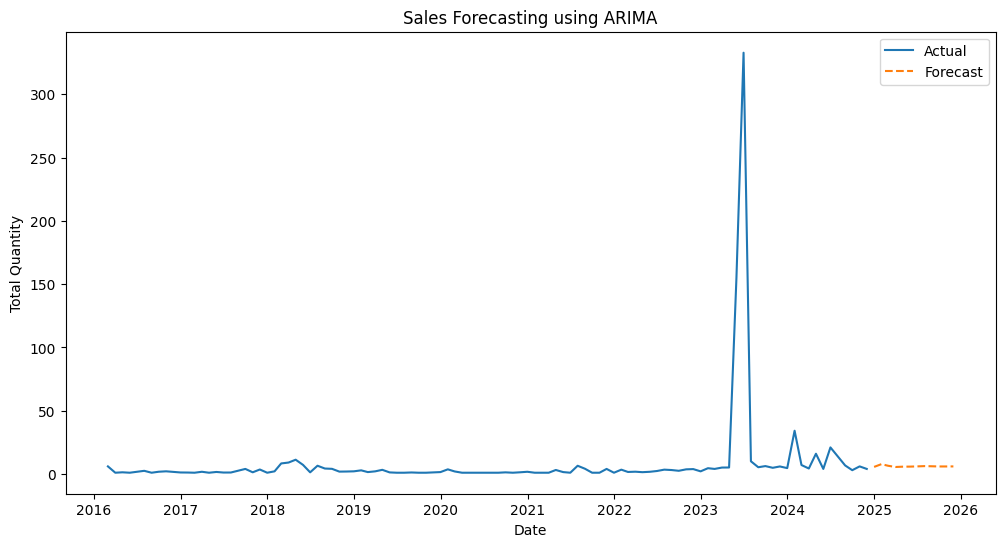

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['total_quantity'], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Sales Forecasting using ARIMA')
plt.legend()
plt.show()


In [50]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

# Assuming 'df' is your DataFrame with 'total_quantity' as the only column
# Filter data for the past 2 years
end_date = df.index[-1]  # Get the last date in the DataFrame
start_date = end_date - pd.DateOffset(years=2)  # Calculate the start date for the past 2 years
df_2_years = df[start_date:end_date]

train_size = int(len(df_2_years) * 0.8)  # Use 80% of the data for training

# Split the data into training and test sets
train, test = df_2_years[:train_size], df_2_years[train_size:]

# Fit an ARIMA model
model = ARIMA(train, order=(5,1,0))  # ARIMA(p,d,q) model with p=5, d=1, q=0
model_fit = model.fit()

# Forecast sales
forecast = model_fit.forecast(steps=len(test))[0]

# Calculate RMSE
rmse = sqrt(((test.values - forecast)**2).mean())
print('Test RMSE: %.3f' % rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Test RMSE: 6.940


ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

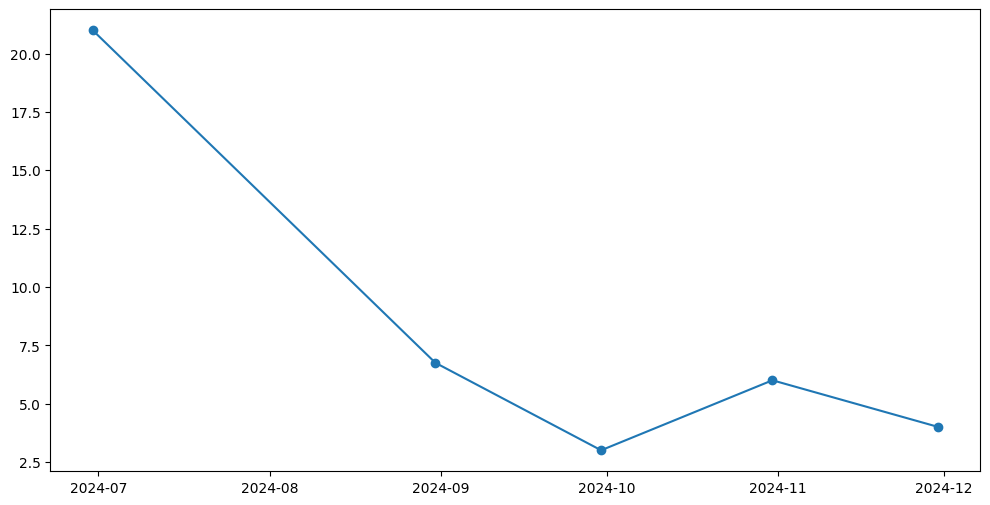

In [57]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['total_quantity'], label='Actual', marker='o')

# Plot the forecasted values
plt.plot(test.index, forecast, label='Forecast', marker='o')

plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid(True)
plt.show()
